 ## Importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection,neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix

## Fetching our data

In [ ]:
data = pd.read_csv('/content/kerala_rainfall.csv')

In [ ]:
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

In [ ]:
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

<ipython-input-170-dd8179764592>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
<ipython-input-170-dd8179764592>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)


In [ ]:
print(data)

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT    NOV   

Separating the rainfalls for every month and the outcome

In [ ]:
x=data.iloc[:,1:14]
print(x)

     YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG    SEP  \
0    1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5  197.7   
1    1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8  491.6   
2    1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2  341.8   
3    1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8  222.7   
4    1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6  217.2   
..    ...   ...   ...   ...    ...    ...     ...     ...     ...    ...   
113  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9  298.8   
114  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2  292.9   
115  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5  173.2   
116  2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8  209.5   
117  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9  423.6   

       OCT    NOV    DEC  
0    266.9  350.8   48.4  
1    358.4  158.3  121.5  
2    3

In [ ]:
y=data.iloc[:,-1]
print(y)

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int64


# Time to build our predictors

In [ ]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Lets use K-Neareast Neighbours


In [ ]:
clf=neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_predict=clf.predict(x_test)
y_predict

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1])

In [ ]:
x_train_std=minmax.fit_transform(x_train)
x_test_std=minmax.fit_transform(x_test)
knn_acc=cross_val_score(clf,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
knn_proba=cross_val_predict(clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
print(knn_acc)

[0.84375    0.74193548 0.70967742]


In [ ]:
print(knn_proba)

[[1.  0. ]
 [0.4 0.6]
 [0.8 0.2]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [0.8 0.2]
 [0.  1. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [0.4 0.6]
 [0.2 0.8]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.2 0.8]
 [0.8 0.2]
 [1.  0. ]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [0.8 0.2]
 [0.2 0.8]
 [0.2 0.8]
 [0.4 0.6]
 [0.  1. ]
 [0.4 0.6]
 [0.2 0.8]
 [0.4 0.6]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [0.2 0.8]
 [0.  1. ]
 [0.6 0.4]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.4 0.6]
 [0.2 0.8]
 [0.2 0.8]
 [1.  0. ]
 [0.8 0.2]
 [0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.6 0.4]
 [0.4 0.6]
 [0.4 0.6]
 [0.8 0.2]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.8 0.2]
 [0.  1. ]
 [0.8 0.2]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.6 0.4]
 [0.2 0.8]
 [0.6 0.4]
 [0.6 0.4]
 [1.  0. ]
 [1.  0. ]
 [0.6 0.4]

In [ ]:
print("Accuracy Score:%f"%(accuracy_score(y_test,y_predict)))
print("Recall Score:%f"%(recall_score(y_test,y_predict)))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict)))
print(confusion_matrix(y_test,y_predict))

Accuracy Score:0.958333
Recall Score:1.000000
ROC score:0.964286
[[13  1]
 [ 0 10]]


## Now Lets Apply Logistic Regression

In [ ]:
x_train_std=minmax.fit_transform(x_train)#It is used to fit the values in between 0 and 1
y_train_std=minmax.transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_acc=cross_val_score(lr,x_train_std,y_train,cv=3,scoring='accuracy',n_jobs=-1)
lr_proba=cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred=lr.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1]


In [ ]:
lr_acc

array([1.        , 0.74193548, 0.93548387])

In [ ]:
lr_proba

array([[0.67069348, 0.32930652],
       [0.57473014, 0.42526986],
       [0.71519302, 0.28480698],
       [0.43349485, 0.56650515],
       [0.105231  , 0.894769  ],
       [0.68967434, 0.31032566],
       [0.21514412, 0.78485588],
       [0.58690481, 0.41309519],
       [0.64377477, 0.35622523],
       [0.10363035, 0.89636965],
       [0.36428625, 0.63571375],
       [0.33392711, 0.66607289],
       [0.59211055, 0.40788945],
       [0.67980281, 0.32019719],
       [0.42787421, 0.57212579],
       [0.71249509, 0.28750491],
       [0.44861274, 0.55138726],
       [0.42599098, 0.57400902],
       [0.76798325, 0.23201675],
       [0.7863097 , 0.2136903 ],
       [0.31624055, 0.68375945],
       [0.62629062, 0.37370938],
       [0.35491692, 0.64508308],
       [0.23514524, 0.76485476],
       [0.47430391, 0.52569609],
       [0.34029534, 0.65970466],
       [0.65067643, 0.34932357],
       [0.29010634, 0.70989366],
       [0.70486962, 0.29513038],
       [0.63157851, 0.36842149],
       [0.

In [ ]:
print("Accuracy score:%f"%(accuracy_score(y_test,y_pred)))
print("recall score:%f"%(recall_score(y_test,y_pred)))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

Accuracy score:0.916667
recall score:1.000000
roc score:0.928571
[[12  2]
 [ 0 10]]


#### Now Lets apply SVM

In [ ]:
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
svc_proba=cross_val_predict(svc_classifier,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
svc_acc

array([0.9375    , 0.83870968, 0.90322581])

In [ ]:
svc_proba

array([[9.86899687e-01, 1.31003127e-02],
       [4.14030699e-01, 5.85969301e-01],
       [9.67599877e-01, 3.24001226e-02],
       [2.94414969e-01, 7.05585031e-01],
       [6.79951455e-03, 9.93200485e-01],
       [7.81632066e-01, 2.18367934e-01],
       [5.66177013e-03, 9.94338230e-01],
       [8.99842461e-01, 1.00157539e-01],
       [7.82482708e-01, 2.17517292e-01],
       [1.14987132e-05, 9.99988501e-01],
       [5.97725586e-02, 9.40227441e-01],
       [4.24547318e-02, 9.57545268e-01],
       [7.64419403e-01, 2.35580597e-01],
       [9.88739692e-01, 1.12603083e-02],
       [1.04478530e-01, 8.95521470e-01],
       [8.20939623e-01, 1.79060377e-01],
       [2.60981171e-01, 7.39018829e-01],
       [2.08978536e-01, 7.91021464e-01],
       [9.40211233e-01, 5.97887667e-02],
       [9.53385731e-01, 4.66142685e-02],
       [8.75280675e-02, 9.12471932e-01],
       [9.33269239e-01, 6.67307606e-02],
       [1.00299358e-01, 8.99700642e-01],
       [4.06469770e-02, 9.59353023e-01],
       [3.550917

In [ ]:
y_pred=svc_classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1]


In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)))
print("recall score:%f"%(recall_score(y_test,y_pred)))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))


accuracy score:0.875000
recall score:1.000000
roc score:0.892857
[[11  3]
 [ 0 10]]


#### Now Lets Use Decision Trees

In [ ]:
dtc_clf=DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc=cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.53125   , 0.70967742, 0.4516129 ])

In [ ]:
y_pred=dtc_clf.predict(x_test)
print(y_pred)

[1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1]


In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:70.000000
roc score:70.714286
[[10  4]
 [ 3  7]]


#### Now lets use Random Forests

In [ ]:
rmf=RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf=rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_acc=cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
print(rmf_acc)

[0.90625    0.74193548 0.77419355]


In [ ]:
rmf_proba=cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')
print(rmf_proba)

[[0.80470499 0.19529501]
 [0.50535619 0.49464381]
 [0.56855168 0.43144832]
 [0.41388691 0.58611309]
 [0.11074302 0.88925698]
 [0.68834299 0.31165701]
 [0.32026855 0.67973145]
 [0.4307658  0.5692342 ]
 [0.62147943 0.37852057]
 [0.21324562 0.78675438]
 [0.44160507 0.55839493]
 [0.51156392 0.48843608]
 [0.64301579 0.35698421]
 [0.68036421 0.31963579]
 [0.47481252 0.52518748]
 [0.62074088 0.37925912]
 [0.35611439 0.64388561]
 [0.31273703 0.68726297]
 [0.79239273 0.20760727]
 [0.65308159 0.34691841]
 [0.46720454 0.53279546]
 [0.54018452 0.45981548]
 [0.42902069 0.57097931]
 [0.29811445 0.70188555]
 [0.47599615 0.52400385]
 [0.47310201 0.52689799]
 [0.76675483 0.23324517]
 [0.3146732  0.6853268 ]
 [0.64155358 0.35844642]
 [0.41408311 0.58591689]
 [0.40381195 0.59618805]
 [0.47379571 0.52620429]
 [0.42342892 0.57657108]
 [0.22121728 0.77878272]
 [0.57845734 0.42154266]
 [0.78465547 0.21534453]
 [0.44146938 0.55853062]
 [0.39981093 0.60018907]
 [0.22573223 0.77426777]
 [0.54937845 0.45062155]


In [ ]:
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:70.833333
recall score:70.000000
roc score:70.714286
[[10  4]
 [ 3  7]]


#### Comparing our results

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.958333
1   LR  0.916667
2  SVC  0.875000
3   DT  0.708333
4   RF  0.750000


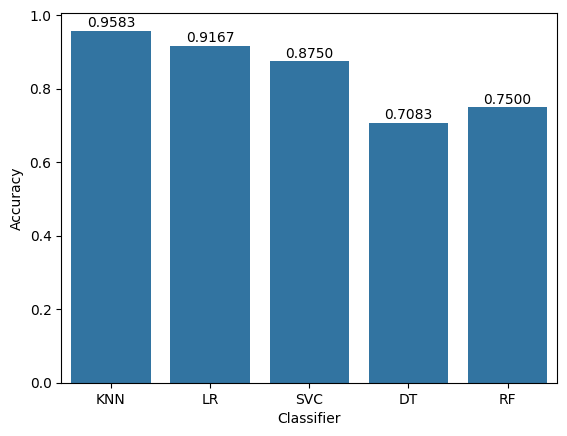

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.01, '{:1.4f}'.format(height), ha="center")

plt.show()

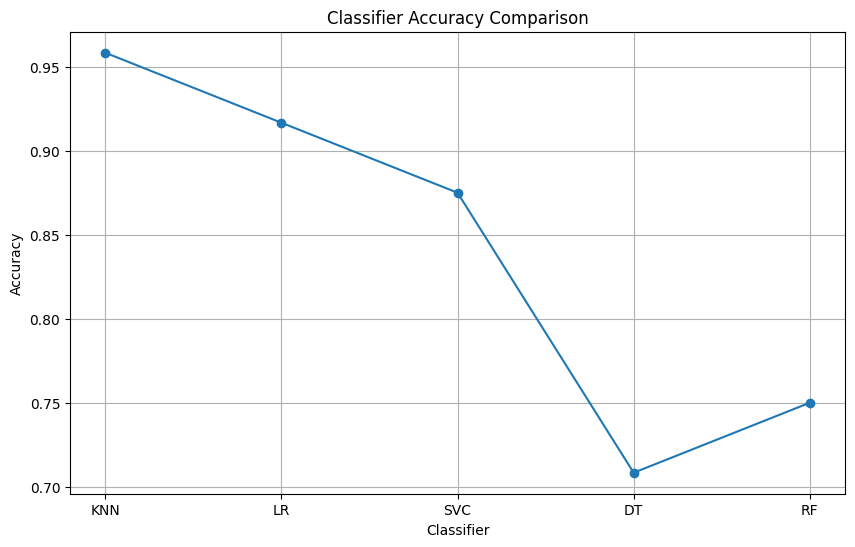

In [ ]:
# prompt: Give me a line graph

plt.figure(figsize=(10, 6))
plt.plot(tr_split['Name'], tr_split['Score'], marker='o', linestyle='-')
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.grid(True)
plt.show()

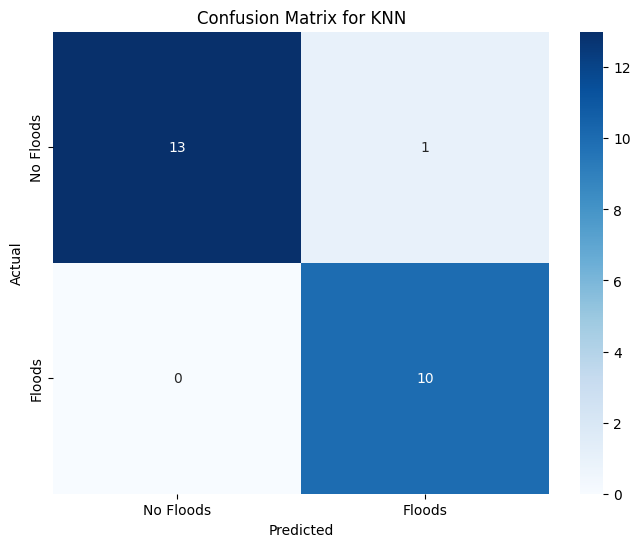

In [ ]:
# prompt: Give me a confusion matrix  graph on KNN

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predict are already defined from your KNN model
cm = confusion_matrix(y_test, y_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Floods', 'Floods'],
            yticklabels=['No Floods', 'Floods'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.show()

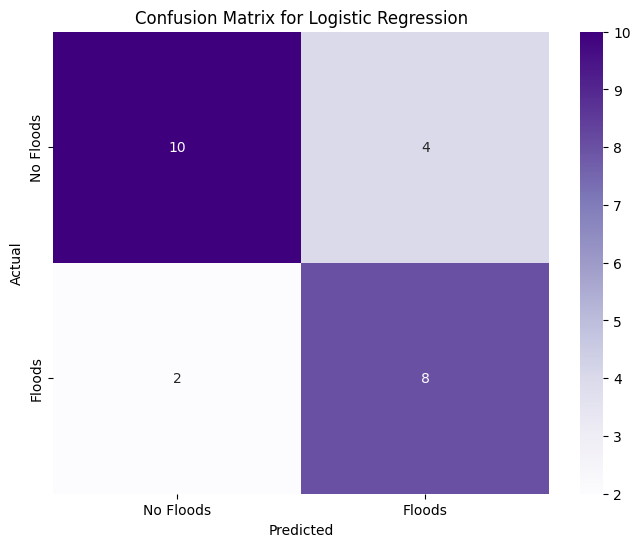

In [ ]:
# prompt: Give me a confusion matrix graph on LR in dark purple

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", # Changed cmap to 'Purples' for a dark purple-like color
            xticklabels=['No Floods', 'Floods'],
            yticklabels=['No Floods', 'Floods'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

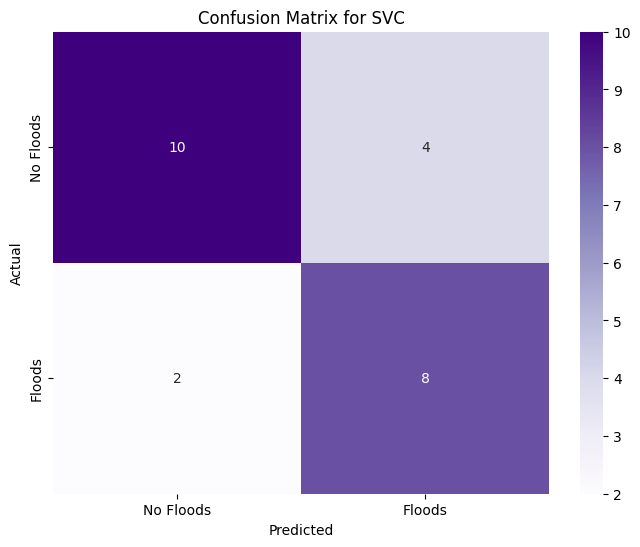

In [ ]:
# prompt: Give me a confusion matrix graph on SVC (Keep the color dark as purple or violet)

# Assuming y_test and y_pred are already defined from your SVC model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",  # Changed cmap to Purples
            xticklabels=['No Floods', 'Floods'],
            yticklabels=['No Floods', 'Floods'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVC")
plt.show()

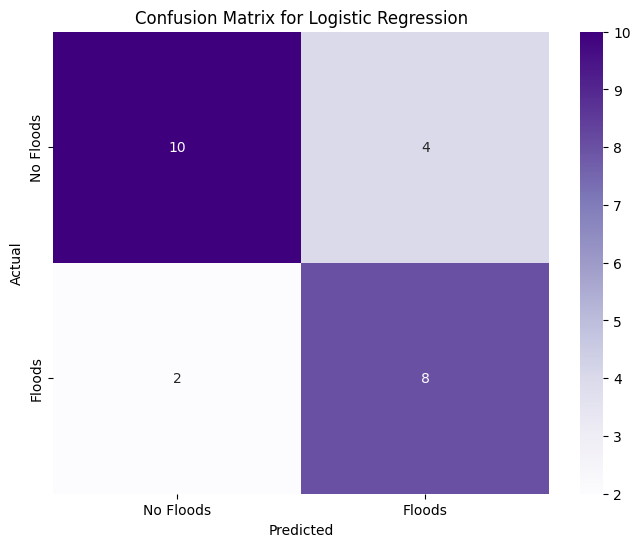

In [ ]:
# prompt: Give me a confusion matrix graph on LR (Keep the color dark as purple or violet)

# Assuming y_test and y_pred are already defined from your Logistic Regression model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", # Changed cmap to 'Purples' for a dark purple-like color
            xticklabels=['No Floods', 'Floods'],
            yticklabels=['No Floods', 'Floods'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()